# PCA-와인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#와인 데이터 표준화
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine=load_wine()
wine_std=StandardScaler().fit_transform(wine.data)

In [3]:
wine.data.shape

(178, 13)

### 차원축소
- 13차원을 2/4/6차원으로 바꿔보기.

In [6]:
#2차원
from sklearn.decomposition import PCA
pca2=PCA(2)
wine_pca2=pca2.fit_transform(wine_std)
wine_pca2[:3]
wine_pca2.shape

(178, 2)

In [7]:
pca2.explained_variance_ratio_,pca2.explained_variance_ratio_.sum()
#2차원으로 줄였더니 55% 밖에 설명 못한다. 

(array([0.36198848, 0.1920749 ]), 0.5540633835693534)

In [8]:
#4차원
pca4=PCA(4)
wine_pca4=pca4.fit_transform(wine_std)
wine_pca4[:3]
wine_pca4.shape

(178, 4)

In [9]:
pca4.explained_variance_ratio_,pca4.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ]), 0.735989990758993)

In [10]:
#6차원
pca6=PCA(6)
wine_pca6=pca6.fit_transform(wine_std)
wine_pca6[:3]
wine_pca6.shape
pca6.explained_variance_ratio_,pca6.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823]), 0.8509811607477046)

2. pca 전후 비교

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
# 원본 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, 
    wine.target, 
    stratify=wine.target, 
    random_state=2022
)
rfc=RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

1.0

In [15]:
# 2차원 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca2, 
    wine.target, 
    stratify=wine.target, 
    random_state=2022
)
rfc2=RandomForestClassifier(random_state=2022)
rfc2.fit(X_train,y_train)
rfc2.score(X_test,y_test)

1.0

In [16]:
# 4차원 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca4, 
    wine.target, 
    stratify=wine.target, 
    random_state=2022
)
rfc4=RandomForestClassifier(random_state=2022)
rfc4.fit(X_train,y_train)
rfc4.score(X_test,y_test)

1.0

In [17]:
# 6차원 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca6, 
    wine.target, 
    stratify=wine.target, 
    random_state=2022
)
rfc6=RandomForestClassifier(random_state=2022)
rfc6.fit(X_train,y_train)
rfc6.score(X_test,y_test)

1.0

### 3.시각화

In [18]:
df=pd.DataFrame(wine_pca2,columns=['PC1','PC2'])
df['target']=wine.target
df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


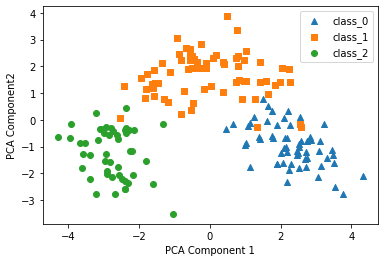

In [19]:
markers=['^','s','o']
for i, marker in enumerate(markers):
    x_data=df[df.target == i]['PC1']
    y_data=df[df.target == i]['PC2']
    plt.scatter(x_data,y_data,marker=marker,label=wine.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component2')
plt.show()

### 4.code refactoring

In [23]:
def pca_accuracy(X,y):
    X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify=y, 
    random_state=123)
    rfc=RandomForestClassifier(random_state=123)
    rfc.fit(X_train,y_train)
    score=rfc.score(X_test,y_test)
    return score


In [24]:
for n in [2,4,6]:
    pca=PCA(n_components=n)
    wine_pca=pca.fit_transform(wine_std)
    explained=pca.explained_variance_ratio_.sum()
    acc=pca_accuracy(wine_pca,wine.target)
    print(f'PCA{n}:설명력-{explained:.4f},정확도-{acc:.4f}')


PCA2:설명력-0.5541,정확도-0.9556
PCA4:설명력-0.7360,정확도-0.9556
PCA6:설명력-0.8510,정확도-0.9333
